In [1]:
%cd ".."

/home/id1896/python/2A/projet-statistique-2022


In [2]:
from gensim import models
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import DBSCAN,AgglomerativeClustering, OPTICS
from sklearn.metrics.pairwise import euclidean_distances
import mantel
from skbio.stats import distance
import scipy.spatial as sp
import scipy.stats

from word_embedding.distance_wmd import *

In [3]:
#Read WMD matrix 
mat_distance_wmd = lecture_fichier_distances_wmd("distances_cbow.7z")
mat_distance_wmd.head()

,0,1,2,3,4,5,6,7,8,9,...,9491,9492,9493,9494,9495,9496,9497,9498,9499,9500
0,0,307,293,386,327,413,329,309,242,632,...,690,370,782,400,277,294,303,327,394,283
1,307,0,81,230,222,370,308,262,131,737,...,735,351,856,419,134,148,160,242,281,115
2,293,81,0,232,229,363,298,239,121,739,...,722,342,853,401,122,145,144,242,260,115
3,386,230,232,0,184,447,350,314,241,758,...,715,451,749,454,188,190,220,176,384,221
4,327,222,229,184,0,397,333,272,218,662,...,680,377,758,390,179,185,221,162,340,194


In [4]:
#On considere mat_distance_wmd comme le doc embedding et on calcule la matrice de distance euclidiennes
mat_distance_euclidean = euclidean_distances(mat_distance_wmd)
mat_distance_euclidean

array([[    0.        , 11654.57631148, 12599.22811128, ...,
         8822.38136786,  5429.20675606, 12648.61103046],
       [11654.57631148,     0.        ,  1514.99438943, ...,
         7618.93785248, 12089.79400155,  2325.92605213],
       [12599.22811128,  1514.99438943,     0.        , ...,
         8520.74081286, 13007.59720317,  2099.5594776 ],
       ...,
       [ 8822.38136786,  7618.93785248,  8520.74081286, ...,
            0.        , 10733.11674212,  7986.39242712],
       [ 5429.20675606, 12089.79400155, 13007.59720317, ...,
        10733.11674212,     0.        , 13093.23371059],
       [12648.61103046,  2325.92605213,  2099.5594776 , ...,
         7986.39242712, 13093.23371059,     0.        ]])

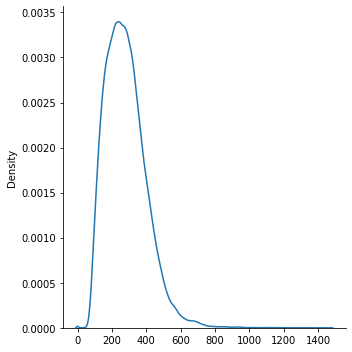

In [5]:
sns.displot(mat_distance_wmd.values[np.triu_indices(mat_distance_wmd.shape[0])],kind="kde")
plt.show()

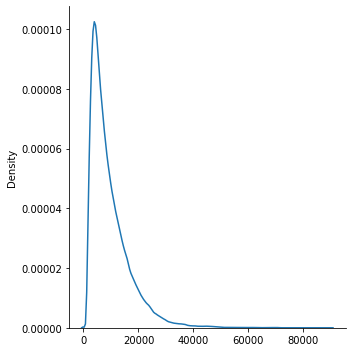

In [6]:
sns.displot(mat_distance_euclidean[np.triu_indices(mat_distance_wmd.shape[0])],kind="kde")
plt.show()

# Test on some clustering algo

### Attention aux etiquettes

In [10]:
#Impact of the choice of matrix DBSCAN
dbsan_wmd= DBSCAN(eps=8, min_samples=5,metric="precomputed").fit(mat_distance_wmd) #interprete mat_distance_wmd comme une matrice de distance
dbsan_euclid = DBSCAN(eps=8, min_samples=5,metric="euclidean").fit(mat_distance_wmd) # interprete mat_distance_wmd comme une matrice d'observations
df_compare_metrique = pd.DataFrame(zip(dbsan_wmd.labels_,dbsan_euclid.labels_), columns=["wmd","euclidean"])
pd.crosstab(df_compare_metrique.wmd,df_compare_metrique.euclidean)

euclidean,-1,0,1,2
wmd,,,,
-1,9482,0,0,0
0,0,6,0,0
1,0,0,5,0
2,0,0,0,8


In [11]:
#Impact of the choice of matrix Hierarchical
nb_cluster = 6
agg_wmd= AgglomerativeClustering(nb_cluster,affinity="precomputed",linkage="single").fit(-mat_distance_wmd)
agg_euclid = AgglomerativeClustering(nb_cluster,affinity="euclidean",linkage="single").fit(mat_distance_wmd)
df_compare_metrique = pd.DataFrame(zip(agg_wmd.labels_,agg_euclid.labels_), columns=["wmd","euclidean"])
pd.crosstab(df_compare_metrique.wmd,df_compare_metrique.euclidean)

# Vectoriel Approche

In [6]:
order = np.inf
mat_distance_wmd_norme = mat_distance_wmd/np.linalg.norm(mat_distance_wmd, ord=order)
mat_distance_euclidean_norme = mat_distance_euclidean/np.linalg.norm(mat_distance_euclidean)

print(f"Norme {order} de la matrice wmd {np.linalg.norm(mat_distance_wmd)}")
print(f"Norme {order} de la matrice euclidiean {np.linalg.norm(mat_distance_euclidean)}")
print(f"Norme {order} des differences {np.linalg.norm(mat_distance_wmd_norme - mat_distance_euclidean_norme)}")

Norme inf de la matrice wmd 2890298.834267834
Norme inf de la matrice euclidiean 115489897.73552825
Norme inf des differences 0.7558681201164121


In [17]:
mat_distance_wmd_norme 

,0,1,2,3,4,5,6,7,8,9,...,9491,9492,9493,9494,9495,9496,9497,9498,9499,9500
0,0.000000,0.000029,0.000028,0.000036,0.000031,0.000039,0.000031,0.000029,0.000023,0.000060,...,0.000065,0.000035,0.000074,0.000038,0.000026,0.000028,0.000029,0.000031,0.000037,0.000027
1,0.000029,0.000000,0.000008,0.000022,0.000021,0.000035,0.000029,0.000025,0.000012,0.000069,...,0.000069,0.000033,0.000081,0.000040,0.000013,0.000014,0.000015,0.000023,0.000026,0.000011
2,0.000028,0.000008,0.000000,0.000022,0.000022,0.000034,0.000028,0.000023,0.000011,0.000070,...,0.000068,0.000032,0.000080,0.000038,0.000012,0.000014,0.000014,0.000023,0.000025,0.000011
3,0.000036,0.000022,0.000022,0.000000,0.000017,0.000042,0.000033,0.000030,0.000023,0.000071,...,0.000067,0.000043,0.000071,0.000043,0.000018,0.000018,0.000021,0.000017,0.000036,0.000021
4,0.000031,0.000021,0.000022,0.000017,0.000000,0.000037,0.000031,0.000026,0.000021,0.000062,...,0.000064,0.000036,0.000071,0.000037,0.000017,0.000017,0.000021,0.000015,0.000032,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,0.000028,0.000014,0.000014,0.000018,0.000017,0.000034,0.000027,0.000022,0.000014,0.000067,...,0.000064,0.000035,0.000076,0.000036,0.000013,0.000000,0.000017,0.000018,0.000027,0.000014
9497,0.000029,0.000015,0.000014,0.000021,0.000021,0.000035,0.000026,0.000024,0.000016,0.000067,...,0.000064,0.000030,0.000075,0.000036,0.000013,0.000017,0.000000,0.000021,0.000030,0.000013
9498,0.000031,0.000023,0.000023,0.000017,0.000015,0.000041,0.000033,0.000028,0.000022,0.000068,...,0.000064,0.000038,0.000064,0.000040,0.000016,0.000018,0.000021,0.000000,0.000036,0.000020
9499,0.000037,0.000026,0.000025,0.000036,0.000032,0.000028,0.000036,0.000029,0.000027,0.000073,...,0.000068,0.000036,0.000087,0.000042,0.000028,0.000027,0.000030,0.000036,0.000000,0.000024


In [23]:
order = 2
mat_wmd_normalised = mat_distance_wmd/np.linalg.norm(mat_distance_wmd, ord=order,axis=0)
mat_euclidean_normalised = mat_distance_euclidean/np.linalg.norm(mat_distance_euclidean, ord=order,axis=0)

sns.displot(np.linalg.norm(mat_wmd_normalised - mat_euclidean_normalised,ord=order,axis=0))
sp.distance.cdist(mat_distance_wmd,mat_distance_euclidean,metric="cosine")
# mat_distance_euclidean_norme = mat_distance_euclidean/np.linalg.norm(mat_distance_euclidean)

# print(f"Norme {order} de la matrice wmd {np.linalg.norm(mat_distance_wmd)}")
# print(f"Norme {order} de la matrice euclidiean {np.linalg.norm(mat_distance_euclidean)}")
# print(f"Norme {order} des differences {np.linalg.norm(mat_distance_wmd_norme - mat_distance_euclidean_norme)}")